In [17]:
import pandas as pd
data = {
    'House_Size_sqft': [1000, 1500, 2000, 2500, 3000],
    'House_Price_dollar': [50, 60, 70, 80, 90]
}
df=pd.DataFrame(data)
df.head()

,House_Size_sqft,House_Price_dollar
0,1000,50
1,1500,60
2,2000,70
3,2500,80
4,3000,90


In [31]:
#covariance
# Calculate means
X_mean = df['House_Size_sqft'].mean()
Y_mean = df['House_Price_dollar'].mean()

# Subtract means
df['X_minus_mean'] = df['House_Size_sqft'] - X_mean
df['Y_minus_mean'] = df['House_Price_dollar'] - Y_mean

# Multiply and take average
df['Product'] = df['X_minus_mean'] * df['Y_minus_mean']

Cov_XY = df['Product'].sum() / len(df)
print(df.head())
print(f"Covariance of X,Y = {Cov_XY}")


   House_Size_sqft  House_Price_dollar  X_minus_mean  Y_minus_mean  Product
0             1000                  50       -1000.0         -20.0  20000.0
1             1500                  60        -500.0         -10.0   5000.0
2             2000                  70           0.0           0.0      0.0
3             2500                  80         500.0          10.0   5000.0
4             3000                  90        1000.0          20.0  20000.0
Covariance of X,Y = 10000.0


In [33]:
'''Why Covariance Alone Isn’t Enough

Covariance depends on units of measurement, making it hard to compare:

For example:

If you measured size in sq.ft, you got 50,000.

If you measured size in sq.m, covariance value would change, even though the relationship didn’t.

So we need a standardized version → that’s where correlation comes in.
'''

In [41]:
'''Correlation Coefficient :
It removes units by dividing by the standard deviations.

It gives a normalized value between -1 and +1:

+1 → perfect positive linear relation

0 → no linear relation

-1 → perfect negative linear relation
'''
std_x=df['House_Size_sqft'].std()
std_y=df['House_Price_dollar'].std()
corr=Cov_XY/(std_x*std_y)
print(f"Correlation Coefficient btw X,Y is:{corr}")

Correlation Coefficient btw X,Y is:0.8


In [ ]:
#output 0.8 > 0 means both X,Y are positively correlated 

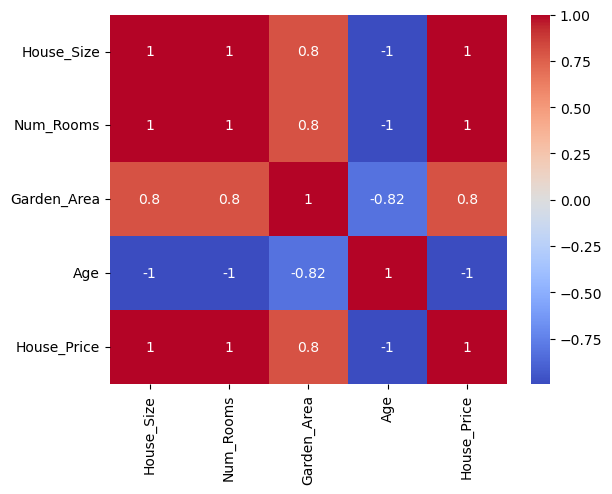

In [43]:
'''Correlation Coefficient : For Numeric , linear data finds relevance and redundancy
Relevance:feature wrt label: high valued must be considered, metric used:correlation coefficient(r)
Redundancy:feature wrt feature :same valued means , among 2 consider 1 only, metric used:correlation matrix
'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'House_Size': [1000,1500,2000,2500,3000],
    'Num_Rooms': [2,3,4,5,6],
    'Garden_Area': [50,60,55,70,65],
    'Age': [20,15,10,5,2],
    'House_Price': [50,60,70,80,90]
})
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



In [ ]:
'''House_Size ↔ House_Price: r ≈ +1 → keep

Num_Rooms ↔ House_Price: r ≈ +1 → keep or drop one if redundant

Garden_Area ↔ House_Price: moderate → optional

Age ↔ House_Price: negative correlation → keep if meaningful

# Example: remove Num_Rooms if highly correlated with House_Size
selected_features = ['House_Size', 'Age', 'Garden_Area']

'''